In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
#dir_data = './data/'
dir_data = 'file:///C:/Users/tthcy/Documents/ML馬拉松/Part01/'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [6]:
app_train.columns 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
app_train.shape

(307511, 122)

In [9]:
app_train['AMT_INCOME_TOTAL'].sum()

51907216960.935005

In [10]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

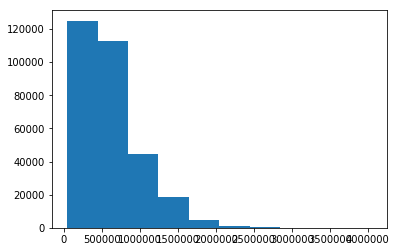

In [11]:
plt.hist(app_train['AMT_CREDIT'])
plt.show()

In [13]:
ingroup = app_train['AMT_INCOME_TOTAL'].groupby(app_train['NAME_INCOME_TYPE']).mean()  #將資料依不同工作類別作平均

In [14]:
print(ingroup)

NAME_INCOME_TYPE
Businessman             652500.000000
Commercial associate    202955.327289
Maternity leave         140400.000000
Pensioner               136401.292273
State servant           179737.969506
Student                 170500.000000
Unemployed              110536.363636
Working                 163169.889223
Name: AMT_INCOME_TOTAL, dtype: float64


In [15]:
ingroup.size #data count

8

In [16]:
type(ingroup)

pandas.core.series.Series

In [17]:
ingroup.values #array

array([652500.        , 202955.32728884, 140400.        , 136401.29227322,
       179737.9695056 , 170500.        , 110536.36363636, 163169.88922292])

(array([4., 3., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([110536.36363636, 164732.72727273, 218929.09090909, 273125.45454545,
        327321.81818182, 381518.18181818, 435714.54545455, 489910.90909091,
        544107.27272727, 598303.63636364, 652500.        ]),
 <a list of 10 Patch objects>)

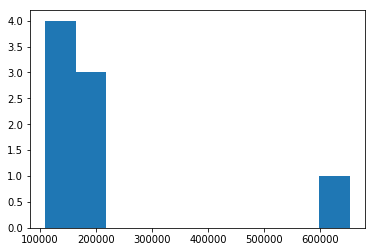

In [18]:
plt.hist(ingroup.values)

In [19]:
ingroup.index

Index(['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner',
       'State servant', 'Student', 'Unemployed', 'Working'],
      dtype='object', name='NAME_INCOME_TYPE')

In [20]:
'Working' in ingroup

True